In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from matplotlib import cm

In [30]:
FOLDER_NAME = "relu_vs_v2"

In [31]:
dates = os.listdir(f"../experiments/results/{FOLDER_NAME}/")

In [46]:
teacher_teacher_overlaps = np.linspace(0, 1, 50)

In [32]:
LOG_ERROR_1 = "teacher_0_generalisation_error/log"
LOG_ERROR_2 = "teacher_1_generalisation_error/log"

In [33]:
dates

['2020-08-19-21-19-07',
 '2020-08-19-21-19-38',
 '2020-08-19-21-19-06',
 '2020-08-19-21-19-39',
 '2020-08-19-21-19-41',
 '2020-08-19-21-19-24',
 '2020-08-19-21-19-23',
 '2020-08-19-21-19-12',
 '2020-08-19-21-19-40',
 '2020-08-19-21-19-47',
 '2020-08-19-21-19-14',
 '2020-08-19-21-19-25',
 '2020-08-19-21-19-03',
 '2020-08-19-21-19-04',
 '2020-08-19-21-19-32',
 '2020-08-19-21-19-35',
 '2020-08-19-21-19-33',
 '2020-08-19-21-19-02',
 '2020-08-19-21-08-02',
 '2020-08-19-21-08-04',
 '2020-08-19-21-08-03',
 '2020-08-19-21-19-27',
 '2020-08-19-21-19-11',
 '2020-08-19-21-19-16',
 '2020-08-19-21-19-28',
 '2020-08-19-21-19-26']

In [41]:
def get_dfs_from_dates(dates):
    dfs = {}
    for date in dates:
        indices = os.listdir(f"../experiments/results/{FOLDER_NAME}/{date}")
        for index in indices:
            dfs[index] = pd.read_csv(f"../experiments/results/{FOLDER_NAME}/{date}/{index}/data_logger.csv")
    return dfs

In [42]:
def get_dfs(folder):
    dfs = {}
    indices = os.listdir(folder)
    for index in indices:
        try:
            dfs[index] = pd.read_csv(f"{folder}/{index}/data_logger.csv")
        except:
            print(f"index {index} not found")
    return dfs

In [43]:
dfs = get_dfs("../experiments/results/relu_vs_v2/")

index 2020-08-19-21-19-07 not found
index 2020-08-19-21-19-38 not found
index 2020-08-19-21-19-06 not found
index 2020-08-19-21-19-39 not found
index .DS_Store not found
index 2020-08-19-21-19-41 not found
index 2020-08-19-21-19-24 not found
index 2020-08-19-21-19-23 not found
index 2020-08-19-21-19-12 not found
index 2020-08-19-21-19-40 not found
index 2020-08-19-21-19-47 not found
index 2020-08-19-21-19-14 not found
index 2020-08-19-21-19-25 not found
index 2020-08-19-21-19-03 not found
index 2020-08-19-21-19-04 not found
index 2020-08-19-21-19-32 not found
index 2020-08-19-21-19-35 not found
index 2020-08-19-21-19-33 not found
index 2020-08-19-21-19-02 not found
index 2020-08-19-21-08-02 not found
index 2020-08-19-21-08-04 not found
index 2020-08-19-21-08-03 not found
index 2020-08-19-21-19-27 not found
index 2020-08-19-21-19-11 not found
index 2020-08-19-21-19-16 not found
index 2020-08-19-21-19-28 not found
index 2020-08-19-21-19-26 not found


/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


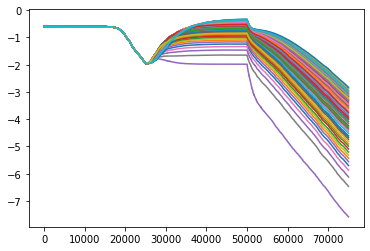

In [40]:
fig = plt.figure()
for index in dfs.keys():
    t1_error = dfs[index][LOG_ERROR_1]
#     t2_error = dfs[index][LOG_ERROR_2]
    plt.plot(range(len(t1_error)), t1_error)
#     plt.plot(range(len(t2_error)), t2_error)
fig.show()

In [47]:
orange_color_map = cm.get_cmap('Oranges')
green_color_map = cm.get_cmap('Greens')

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


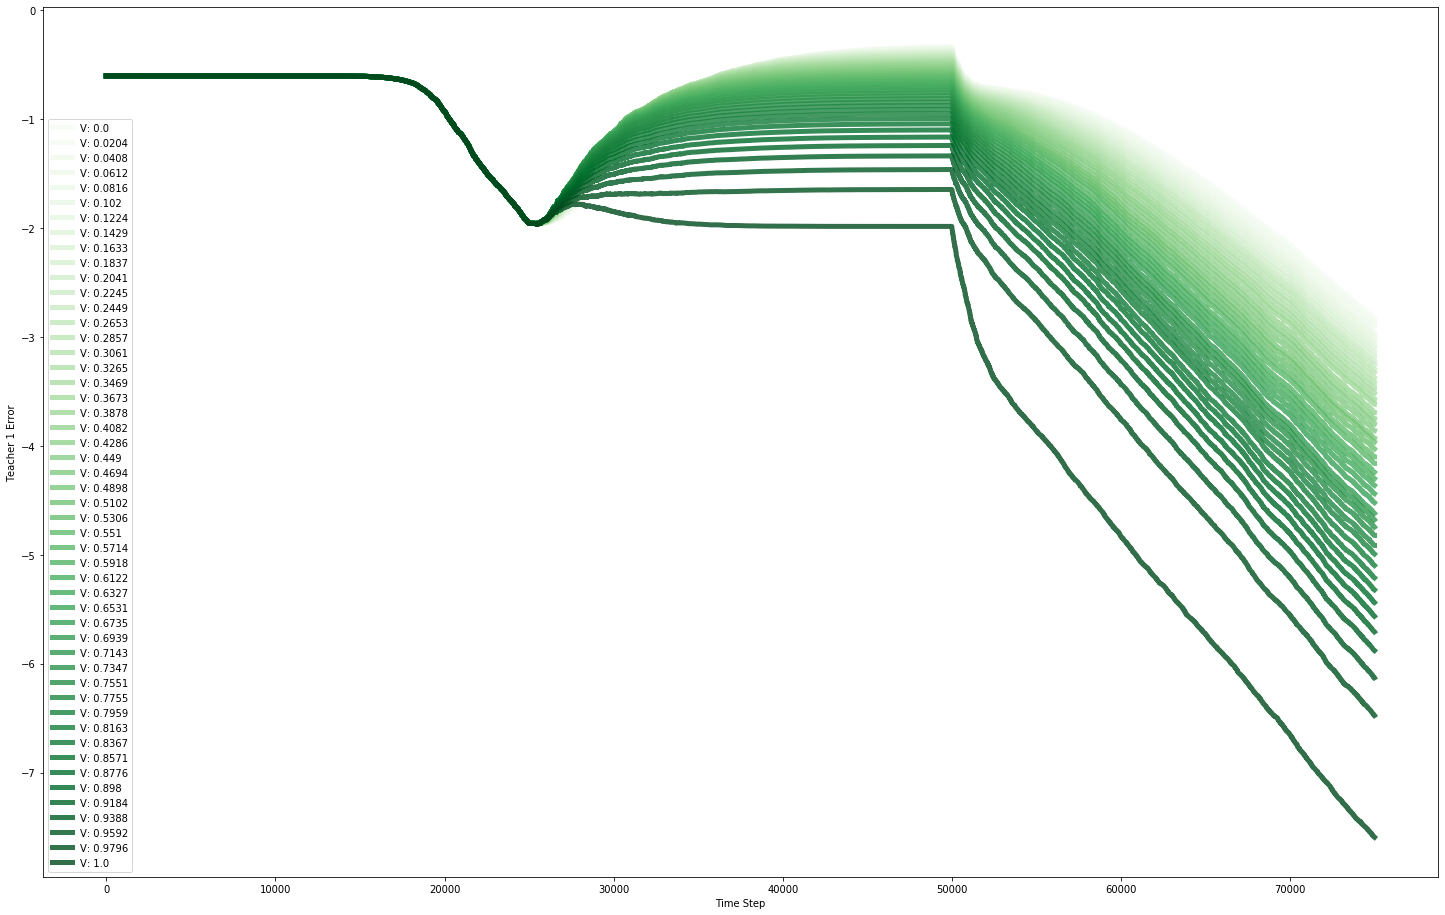

In [49]:
fig = plt.figure(figsize=(25,16))
indices = sorted(dfs.keys(), key=lambda x: int(x))
for i, index in enumerate(indices):
    dfs[index][LOG_ERROR_1].plot(label=f"V: {round(teacher_teacher_overlaps[int(index)], 4)}", color=green_color_map(i/len(indices)), alpha=0.8, linewidth=5)
plt.xlabel("Time Step")
plt.ylabel("Teacher 1 Error")
plt.legend()
# plt.tick_params(
#             axis='both',         # changes apply to the x-axis
#             which='both',      # both major and minor ticks are affected
#             bottom=False,      # ticks along the bottom edge are off
#             top=False,         # ticks along the top edge are off
#             labelbottom=False, # labels along the bottom edge are off
#             left=False,
#             labelleft=False
#         ) 
# plt.xlim((0, 90000))
# plt.ylim((-5, -0.5))
fig.show()
fig.savefig("t1_error.pdf", dpi=100, bbox_inches='tight', pad_inches=0)

/Users/sebastianlee/Envs/cata/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


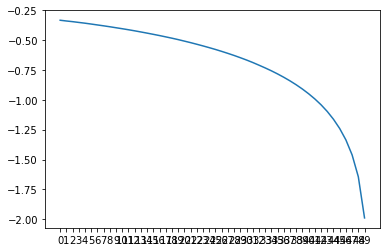

In [54]:
STEP = 50000

fig = plt.figure()
indices = sorted(dfs.keys(), key=lambda x: int(x))
cutoff_errors = []
for i, index in enumerate(indices):
    error = np.array(dfs[index][LOG_ERROR_1])
    cutoff_error = error[STEP]
    cutoff_errors.append(cutoff_error)

plt.plot(indices, cutoff_errors)
fig.show()